In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from LR import LinearRegression
# Veri setini indir
df = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')

# Gender sütununu kaldır
df = df.drop(columns=['Gender'])

# İlk 5 satırı göster
df.head()


,Height,Weight,Index
0,174,96,4
1,189,87,2
2,185,110,4
3,195,104,3
4,149,61,3


In [35]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Height  500 non-null    int64
 1   Weight  500 non-null    int64
 2   Index   500 non-null    int64
dtypes: int64(3)
memory usage: 11.8 KB
None
           Height      Weight       Index
count  500.000000  500.000000  500.000000
mean   169.944000  106.000000    3.748000
std     16.375261   32.382607    1.355053
min    140.000000   50.000000    0.000000
25%    156.000000   80.000000    3.000000
50%    170.500000  106.000000    4.000000
75%    184.000000  136.000000    5.000000
max    199.000000  160.000000    5.000000


In [36]:
#Eksik veri İncelemesi
print(df.isnull().sum())

Height    0
Weight    0
Index     0
dtype: int64


In [37]:
#ekil Değerlerin İncelenmesi
for column in df.columns:
    print(f"{column}: \n{df[column].unique()}\n")


Height: 
[174 189 185 195 149 147 154 169 159 192 155 191 153 157 140 144 172 151
 190 187 163 179 178 160 197 171 175 161 182 188 181 168 176 196 164 143
 141 193 194 180 165 166 186 198 145 183 177 170 142 199 150 146 148 184
 158 167 156 162 173 152]

Weight: 
[ 96  87 110 104  61  92 111  90 103  81  80 101  51  79 107 129 145 139
 149  97  67  64  95  62 159 152 121  52  65 131 153 132 114 120 108  56
 118 126  76 122  72 135  54 105 116  89 127  70  88 143  83 158  59  82
 136 117  75 100 154 140 123  50 141 119 156  69 155 160 106  66 157  60
  57 138 115 151 150 147 124  85 125 146  98  84 102  99  78 109  94  74
  73 134 137 144  93  86 130  58 148  68  71  63  91 142 133  77 128 112
  55  53]

Index: 
[4 2 3 5 1 0]



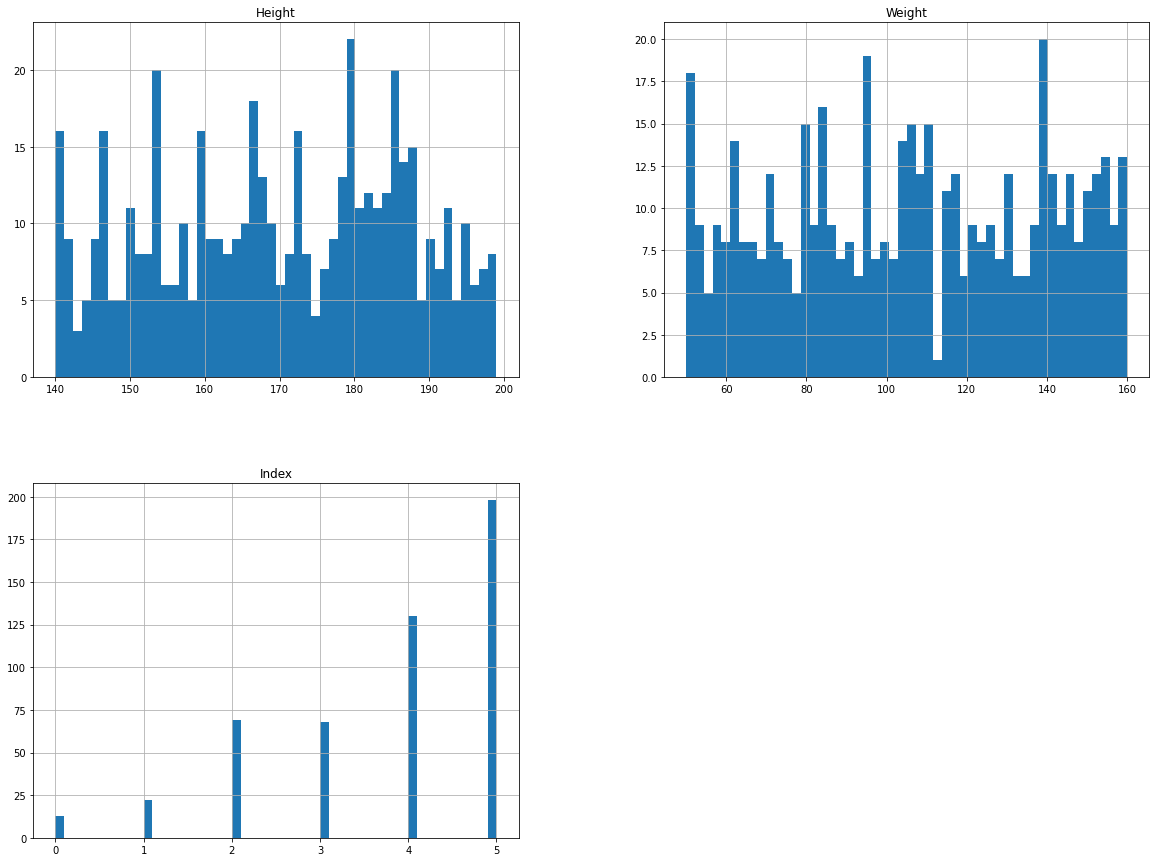

In [38]:
df.hist(bins=50, figsize=(20,15))
plt.show()


<AxesSubplot:>

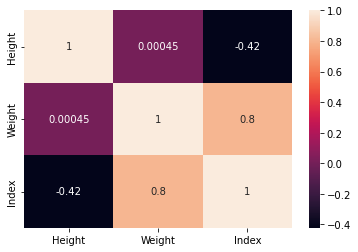

In [39]:
#Korelasyon matrisi: Değişkenler arasındaki ilişkileri incelemek için
sns.heatmap(df.corr(), annot=True)


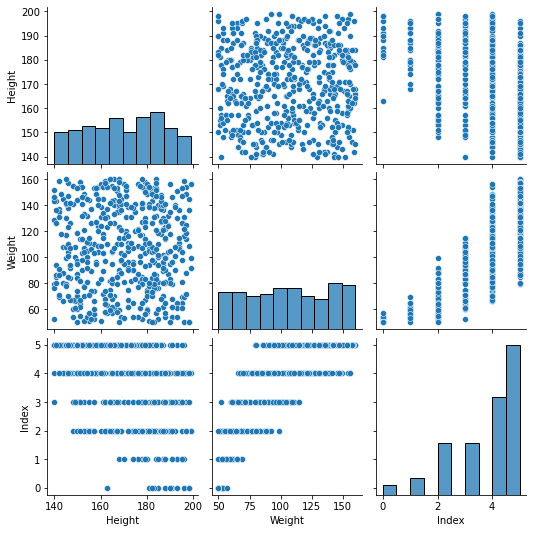

In [40]:
sns.pairplot(df)


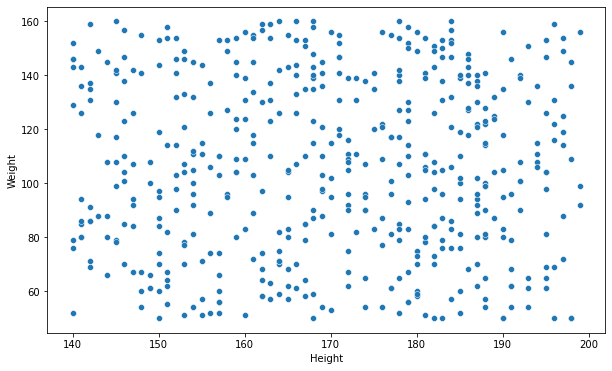

In [41]:
# weight height arasındaki ilişki
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Height', y='Weight')
plt.show()

In [42]:
from sklearn.model_selection import train_test_split

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, Y_train, Y_test = train_test_split(df[['Height', 'Weight']], df['Index'], test_size=0.5, random_state=42)

# Modeli eğitme
model = LinearRegression(learning_rate=0.000005, epochs=1000)
model.fit(X_train['Height'].values, X_train['Weight'].values, Y_train.values)

# Test seti üzerinde tahminler yapma
predictions = model.predict(X_test['Height'].values, X_test['Weight'].values)

# MSE'yi ve R^2 puanını hesaplama
mse = mean_squared_error(Y_test, predictions)
print("MSE:", mse)
r2 = r2_score(Y_test, predictions)
print("R^2:", r2)


MSE: 0.6441302478980424
R^2: 0.6390213809134486


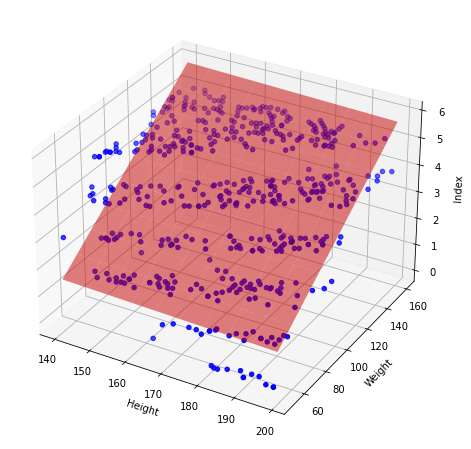

In [43]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Gerçek veri noktalarını çiz
ax.scatter(X1, X2, Y, color='blue', label='Actual')

# Tahmin edilen düzlemi çiz
x1 = np.linspace(min(X1), max(X1), 10)
x2 = np.linspace(min(X2), max(X2), 10)
x1, x2 = np.meshgrid(x1, x2)
Z = model.m1 * x1 + model.m2 * x2 + model.b

ax.plot_surface(x1, x2, Z, color='red', alpha=0.5)
plt.xlabel('Height')
plt.ylabel('Weight')
ax.set_zlabel('Index')
plt.show()


Train MSE: 0.6286783379536038, Test MSE: 0.6432776219353922
Train R^2: 0.665679141981126, Test R^2: 0.6394992031296838


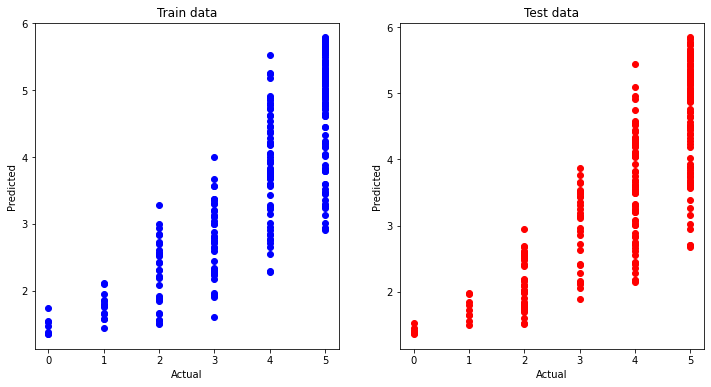

In [44]:
from sklearn.metrics import mean_squared_error, r2_score

# Modeli eğitim seti üzerinde eğitme
model.fit(X_train['Height'].values, X_train['Weight'].values, Y_train.values)

# Eğitim seti üzerinde tahminler yapma
train_predictions = model.predict(X_train['Height'].values, X_train['Weight'].values)

# Test seti üzerinde tahminler yapma
test_predictions = model.predict(X_test['Height'].values, X_test['Weight'].values)

# MSE ve R^2 değerlerini hesaplama
train_mse = mean_squared_error(Y_train, train_predictions)
test_mse = mean_squared_error(Y_test, test_predictions)
train_r2 = r2_score(Y_train, train_predictions)
test_r2 = r2_score(Y_test, test_predictions)

# MSE ve R^2 değerlerini yazdırma
print(f'Train MSE: {train_mse}, Test MSE: {test_mse}')
print(f'Train R^2: {train_r2}, Test R^2: {test_r2}')

# Loss grafiklerini çizme
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(Y_train, train_predictions, 'bo')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Train data')

plt.subplot(1, 2, 2)
plt.plot(Y_test, test_predictions, 'ro')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test data')

plt.show()



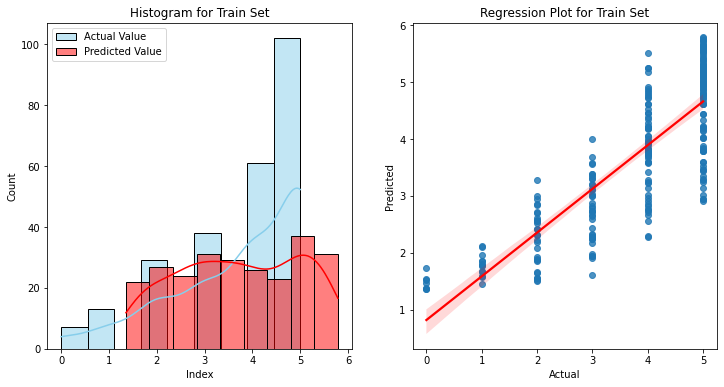

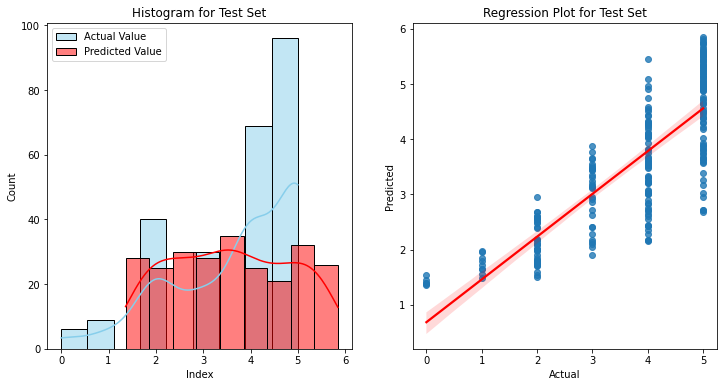

In [45]:

# Seaborn kütüphanesini import etme
import seaborn as sns

# Eğitim seti için histogram ve regresyon çizgisi
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(Y_train, color="skyblue", label="Actual Value", kde=True)
sns.histplot(train_predictions, color="red", label="Predicted Value", kde=True)
plt.title('Histogram for Train Set')
plt.legend()

plt.subplot(1, 2, 2)
sns.regplot(x=Y_train, y=train_predictions, line_kws={"color": "red"})
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Regression Plot for Train Set')

plt.show()

# Test seti için histogram ve regresyon çizgisi
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(Y_test, color="skyblue", label="Actual Value", kde=True)
sns.histplot(test_predictions, color="red", label="Predicted Value", kde=True)
plt.title('Histogram for Test Set')
plt.legend()

plt.subplot(1, 2, 2)
sns.regplot(x=Y_test, y=test_predictions, line_kws={"color": "red"})
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Regression Plot for Test Set')

plt.show()


In [ ]:
#Eğitim ve test veri setlerinin yakın sonuçlar vermesi, modelimizin
#genelleme yeteneğinin güçlü olduğunu göstermektedir. Modelin eğitim
#seti üzerindeki performansı ile test seti üzerindeki performansı arasında
#sadece küçük bir fark bulunmaktadır. Bu durum, modelimizin overfitting yapmadığını,
#yani eğitim verilerine aşırı uyum sağlamadığını gösterir. Aşırı uyum, modelin eğitim
#verilerindeki gürültüyü veya rastgele varyasyonları öğrenmesi ve bunları genelleme yeteneğini
#bozacak şekilde yeni verilere uygulaması durumudur.

In [27]:
#Hesapladığımız Mean Squared Error (MSE) değerleri, modelimizin hatalarının karesel ortalamasını
#verir. MSE değeri ne kadar düşük olursa, model o kadar iyi performans göstermiş olur. Hem eğitim
#hem de test setleri için MSE değerleri 1'den düşük olup birbirlerine çok yakındır, bu da modelimizin
#genel olarak iyi performans gösterdiğini ve hem eğitim hem de test setindeki hataların benzer olduğunu gösterir.

In [28]:
#R^2 değeri ise modelimizin bağımlı değişkendeki varyansın ne kadarını açıkladığını gösterir.
#1'e yakın bir R^2 değeri, modelimizin verilerin çoğunu başarıyla açıkladığını gösterir. Hem 
#eğitim hem de test seti için R^2 değerleri 1'e yakın ve birbirine yakın olması, modelimizin 
#genel olarak veriyi iyi bir şekilde yakaladığını ve modelin genelleme yeteneğinin güçlü olduğunu gösterir.

In [ ]:
#Sonuç olarak, modelimizin genelleme yeteneği güçlüdür ve hem eğitim hem de test setinde iyi performans
#göstermiştir. Ancak modeli daha da iyileştirmek için hiperparametre ayarlamaları, farklı özellik seçimi
#veya daha karmaşık bir model kullanmayı düşünebiliriz.